In [883]:
import os
import pandas as pd
import json


data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Filter for 'StreamingHistory' JSON files
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json")]

# Check if any 'StreamingHistory' JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df = pd.DataFrame(all_data)
    print("First 5 rows of the DataFrame:")
    print(df.head())
    # Convert 'endTime' to datetime format
    df['endTime'] = pd.to_datetime(df['endTime'])

    # Create a new column 'season' based on the month
    df['season'] = df['endTime'].dt.month.map({
        12: 'Winter',
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Fall',
        10: 'Fall',
        11: 'Fall'
    })

    # Create a new column 'artist_track' concatenating artist and track
    df['artist_track'] = df['artistName'] + ' - ' + df['trackName']

    # Find the most frequently listened artist and their songs during each season
    top_artists_season = df.groupby(['season', 'artistName']).size().reset_index(name='count')
    top_artists_season = top_artists_season.sort_values(by=['season', 'count'], ascending=[True, False])
    top_artists_season = top_artists_season.groupby('season').head(1)

    # Print the result
    print("Most Frequently Listened Artist and Their Songs During Each Season:")
    print(top_artists_season[['season', 'artistName', 'count']])

else:
    print("No 'StreamingHistory' JSON files found in the specified directory.")


First 5 rows of the DataFrame:
            endTime artistName                   trackName  msPlayed
0  2023-04-24 08:43  Leah Kate  10 Things I Hate About You      6710
1  2023-04-24 08:43  Leah Kate  10 Things I Hate About You      2260
2  2023-04-24 08:43  Leah Kate  10 Things I Hate About You      5490
3  2023-04-24 08:43  Leah Kate  10 Things I Hate About You       490
4  2023-04-24 08:43  Leah Kate  10 Things I Hate About You      7590
Most Frequently Listened Artist and Their Songs During Each Season:
      season    artistName  count
1       Fall       ALIZADE    112
1042  Spring  Taylor Swift   1090
1183  Summer       ALIZADE    301
2001  Winter    Little Mix    718


In [884]:
import os
import pandas as pd
import json


data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Filter for 'StreamingHistory' JSON files
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json")]

# Check if any 'StreamingHistory' JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df = pd.DataFrame(all_data)

    # Convert 'endTime' to datetime format
    df['endTime'] = pd.to_datetime(df['endTime'])

    # Create a new column 'season' based on the month
    df['season'] = df['endTime'].dt.month.map({
        12: 'Winter',
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Fall',
        10: 'Fall',
        11: 'Fall'
    })

    # Create a new column 'artist_track' concatenating artist and track
    df['artist_track'] = df['artistName'] + ' - ' + df['trackName']

    # Find the most frequently listened artist and their songs during each season
    top_artists_season = df.groupby(['season', 'artistName']).size().reset_index(name='count')
    top_artists_season = top_artists_season.sort_values(by=['season', 'count'], ascending=[True, False])
    top_artists_season = top_artists_season.groupby('season').head(1)

    # Print the result
    print("Most Frequently Listened Artist and Their Songs During Each Season:")
    print(top_artists_season[['season', 'artistName', 'count']])

else:
    print("No 'StreamingHistory' JSON files found in the specified directory.")


Most Frequently Listened Artist and Their Songs During Each Season:
      season    artistName  count
1       Fall       ALIZADE    112
1042  Spring  Taylor Swift   1090
1183  Summer       ALIZADE    301
2001  Winter    Little Mix    718


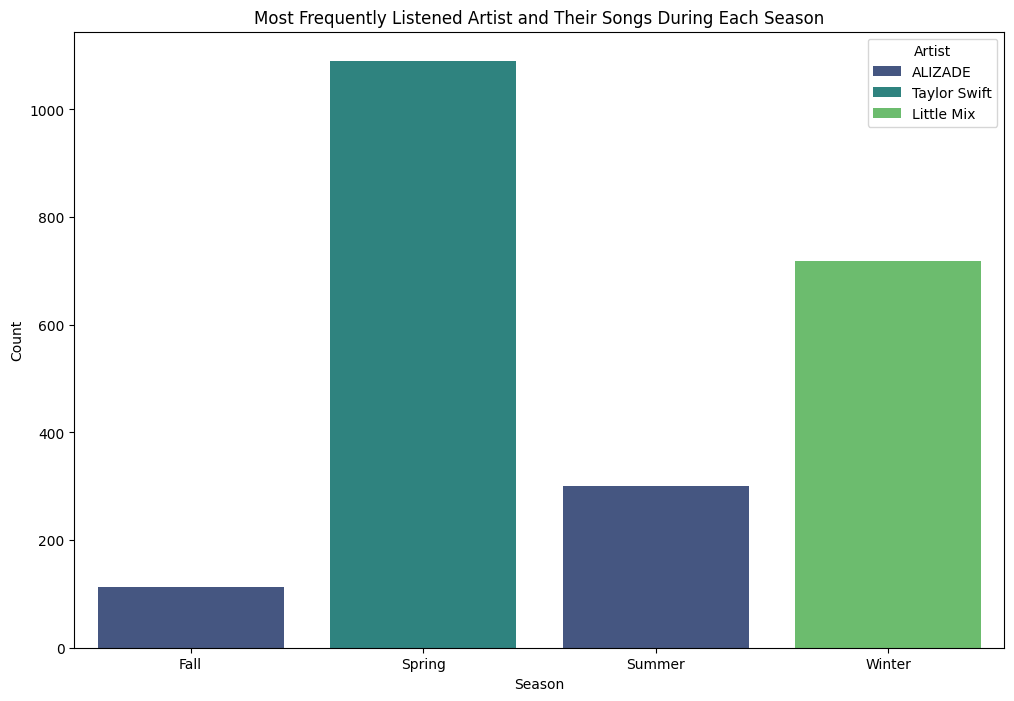

In [885]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for most frequently listened artist in each season
plt.figure(figsize=(12, 8))
sns.barplot(x='season', y='count', hue='artistName', data=top_artists_season, palette='viridis')
plt.title('Most Frequently Listened Artist and Their Songs During Each Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.legend(title='Artist', bbox_to_anchor=(1, 1))
plt.show()


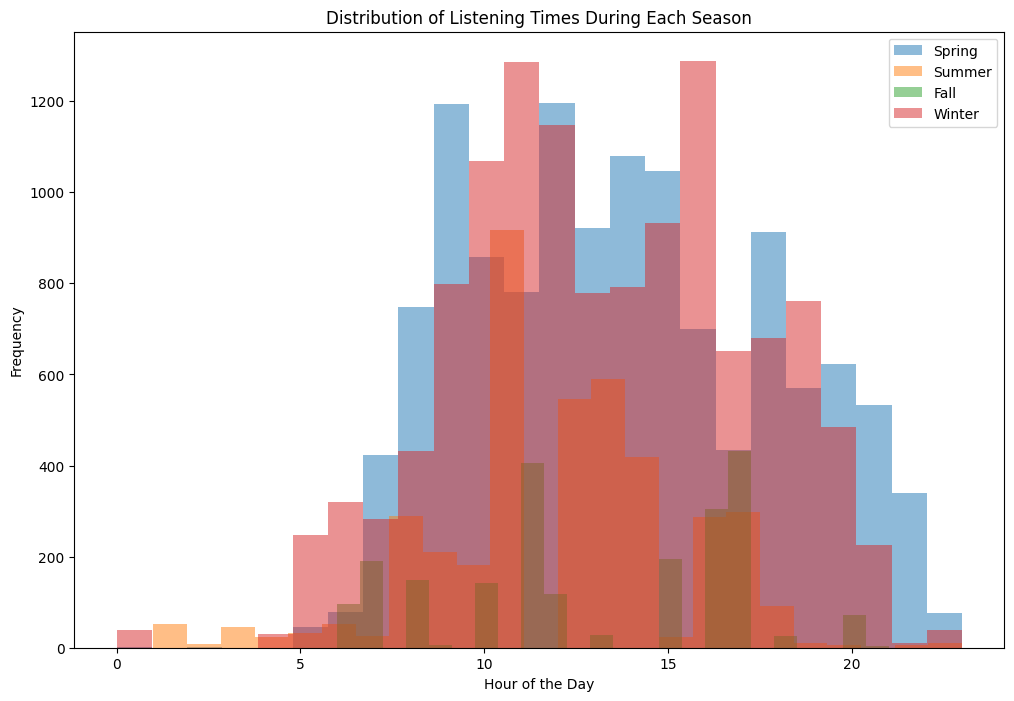

In [886]:

import os
import pandas as pd
import json
import matplotlib.pyplot as plt


data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Filter for 'StreamingHistory' JSON files
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json")]

# Check if any 'StreamingHistory' JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df = pd.DataFrame(all_data)

    # Convert 'endTime' to datetime format
    df['endTime'] = pd.to_datetime(df['endTime'])

    # Create a new column 'season' based on the month
    df['season'] = df['endTime'].dt.month.map({
        12: 'Winter',
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Fall',
        10: 'Fall',
        11: 'Fall'
    })

    # Plot histograms for each season
    seasons = df['season'].unique()
    plt.figure(figsize=(12, 8))

    for season in seasons:
        plt.hist(df[df['season'] == season]['endTime'].dt.hour, bins=24, alpha=0.5, label=season)

    plt.title('Distribution of Listening Times During Each Season')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

else:
    print("No 'StreamingHistory' JSON files found in the specified directory.")


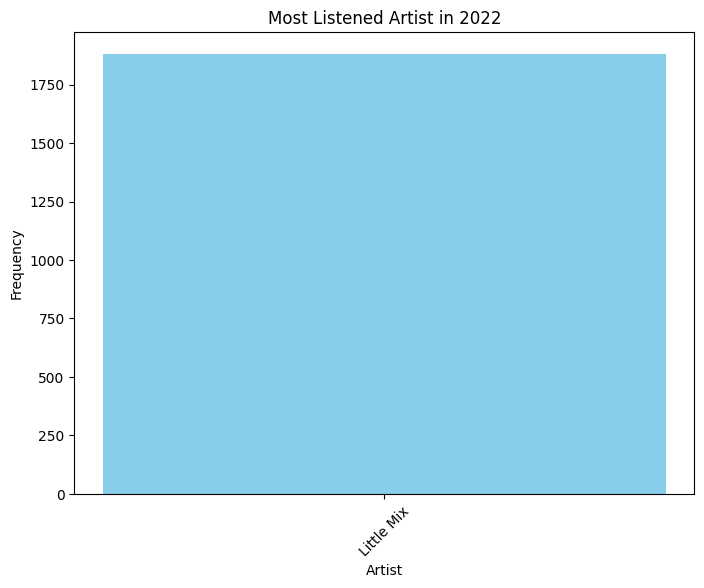

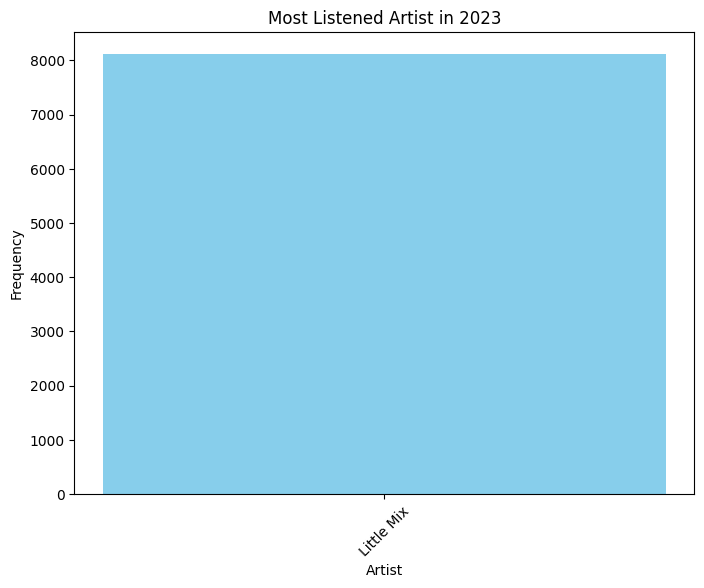

Most Listened Artist in 2022: Little Mix
Most Listened Artist in 2023: Little Mix


In [887]:
import os
import pandas as pd
import json
import matplotlib.pyplot as plt

data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Explicitly specify 'StreamingHistory0.json' in the filtering logic
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json") and '0' in file]

# Check if any 'StreamingHistory' JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df = pd.DataFrame(all_data)

    # Convert 'endTime' to datetime format
    df['endTime'] = pd.to_datetime(df['endTime'])

    # Create a new column 'season' based on the month
    df['season'] = df['endTime'].dt.month.map({
        12: 'Winter',
        1: 'Winter',
        2: 'Winter',
        3: 'Spring',
        4: 'Spring',
        5: 'Spring',
        6: 'Summer',
        7: 'Summer',
        8: 'Summer',
        9: 'Fall',
        10: 'Fall',
        11: 'Fall'
    })

    # Create a new column 'year' based on the year
    df['year'] = df['endTime'].dt.year

    # Plot the most-listened artist for each year
    unique_years = sorted(df['year'].unique())

    for year in unique_years:
        plt.figure(figsize=(8, 6))
        year_data = df[df['year'] == year]
        if not year_data.empty:
            top_artist = year_data['artistName'].value_counts().idxmax()
            plt.bar(top_artist, year_data.shape[0], color='skyblue')
            plt.title(f'Most Listened Artist in {year}')
            plt.xlabel('Artist')
            plt.ylabel('Frequency')
            plt.xticks(rotation=45)
            plt.show()

    # Print the most-listened artist for the years 2022 and 2023
    for year in [2022, 2023]:
        year_data = df[df['year'] == year]
        if not year_data.empty:
            top_artist = year_data['artistName'].value_counts().idxmax()
            print(f"Most Listened Artist in {year}: {top_artist}")

    # Save the combined DataFrame to a CSV file
    csv_file_name = os.path.join(data_directory, 'combined_data.csv')
    df.to_csv(csv_file_name, index=False)
    #print(f"Combined CSV file '{csv_file_name}' created successfully!")

else:
    print("No 'StreamingHistory' JSON files found in the specified directory.")


In [888]:
import os
import pandas as pd
import json


data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Filter for 'StreamingHistory' JSON files
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json")]

# Add 'playlist.json' to the list of files
playlist_file = 'playlist.json'
if playlist_file in files_in_directory:
    json_files.append(playlist_file)

# Check if any relevant JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df = pd.DataFrame(all_data)

    # Convert 'endTime' to datetime format
    if 'endTime' in df.columns:
        df['endTime'] = pd.to_datetime(df['endTime'], errors='coerce')

    # Create a new column 'season' based on the month
    if 'endTime' in df.columns:
        df['season'] = df['endTime'].dt.month.map({
            12: 'Winter',
            1: 'Winter',
            2: 'Winter',
            3: 'Spring',
            4: 'Spring',
            5: 'Spring',
            6: 'Summer',
            7: 'Summer',
            8: 'Summer',
            9: 'Fall',
            10: 'Fall',
            11: 'Fall'
        })

    # Create a new column 'year' based on the 'endTime'
    if 'endTime' in df.columns:
        df['year'] = df['endTime'].dt.year

    # Group by 'season', 'artistName', and 'trackName' to find the count of each song
    most_played_songs = df.groupby(['season', 'year', 'artistName', 'trackName']).size().reset_index(name='count') \
        .sort_values(['season', 'year', 'artistName', 'count'], ascending=[True, True, False, False]).groupby(['season', 'year', 'artistName']).head(1)

    # Print the most played songs for each artist in each season
    print("\nMost Played Songs for Each Artist in Each Season:")
    print(most_played_songs)

else:
    print("No relevant JSON files found in the specified directory.")



Most Played Songs for Each Artist in Each Season:
      season  year           artistName                   trackName  count
586     Fall  2023          İrem Derici                    Yaz Gülü      1
585     Fall  2023         Çağan Şengül                   Çok Yazık      1
584     Fall  2023            yungcihad            YALA DEDI YALAMA      2
583     Fall  2023             vaultboy            everything sucks      1
579     Fall  2023         mor ve ötesi              Bir Derdim Var     30
...      ...   ...                  ...                         ...    ...
4413  Winter  2023  5 Seconds of Summer                       Teeth      8
4410  Winter  2023           404vincent                   Dumb Luck      1
4409  Winter  2023             347aidan                   MEMORIES!      1
4394  Winter  2023             24kGoldn          Dawn to Dusk(不眠不休)     23
4384  Winter  2023             2 Chainz  We Own It (Fast & Furious)      2

[2542 rows x 5 columns]


In [889]:
import os
import pandas as pd
import json

data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Filter for 'StreamingHistory' JSON files
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json")]

# Add 'playlist.json' to the list of files
playlist_file = 'playlist.json'
if playlist_file in files_in_directory:
    json_files.append(playlist_file)

# List of artists for which you want to find the most played songs
target_artists = ['Alizade', 'Taylor Swift', 'Little Mix']

# Check if any relevant JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df = pd.DataFrame(all_data)

    # Convert 'endTime' to datetime format
    if 'endTime' in df.columns:
        df['endTime'] = pd.to_datetime(df['endTime'], errors='coerce')

    # Create a new column 'season' based on the month
    if 'endTime' in df.columns:
        df['season'] = df['endTime'].dt.month.map({
            12: 'Winter',
            1: 'Winter',
            2: 'Winter',
            3: 'Spring',
            4: 'Spring',
            5: 'Spring',
            6: 'Summer',
            7: 'Summer',
            8: 'Summer',
            9: 'Fall',
            10: 'Fall',
            11: 'Fall'
        })

    # Create a new column 'year' based on the 'endTime'
    if 'endTime' in df.columns:
        df['year'] = df['endTime'].dt.year

    # Filter the DataFrame for the target artists
    filtered_df = df[df['artistName'].isin(target_artists)]

    # Group by 'season', 'year', 'artistName', and 'trackName' to find the count of each song
    most_played_songs = filtered_df.groupby(['season', 'year', 'artistName', 'trackName']).size().reset_index(name='count') \
        .sort_values(['season', 'year', 'artistName', 'count'], ascending=[True, True, False, False]).groupby(['season', 'year', 'artistName']).head(1)

    # Print the most played songs for each artist in each season
    print("\nMost Played Songs for Each Artist in Each Season:")
    print(most_played_songs)

else:
    print("No relevant JSON files found in the specified directory.")



Most Played Songs for Each Artist in Each Season:
     season  year    artistName                 trackName  count
12     Fall  2023  Taylor Swift                 Anti-Hero      7
6      Fall  2023    Little Mix  Secret Love Song, Pt. II     18
120  Spring  2023  Taylor Swift            Don’t Blame Me     45
52   Spring  2023    Little Mix                 Little Me     61
241  Summer  2023  Taylor Swift                 Enchanted      9
232  Summer  2023    Little Mix          Love Me Like You      2
279  Winter  2022  Taylor Swift                 Enchanted     11
261  Winter  2022    Little Mix       Love Me or Leave Me     15
355  Winter  2023  Taylor Swift            Don’t Blame Me     25
297  Winter  2023    Little Mix               Cut You Off     49


In [890]:
import os
import pandas as pd
import json

# Replace '/Users/eylul/Desktop/sptfydt/' with the actual path to your directory containing JSON files
data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Filter for 'StreamingHistory' JSON files
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json")]

# Add 'playlist.json' to the list of files
playlist_file = 'playlist.json'
if playlist_file in files_in_directory:
    json_files.append(playlist_file)

# List of artists for which you want to find the most played songs
target_artists = ['Alizade', 'Taylor Swift', 'Little Mix']

# Check if any relevant JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df_spotify = pd.DataFrame(all_data)

    # Convert 'endTime' to datetime format
    if 'endTime' in df_spotify.columns:
        df_spotify['endTime'] = pd.to_datetime(df_spotify['endTime'], errors='coerce')

    # Create a new column 'season' based on the month
    if 'endTime' in df_spotify.columns:
        df_spotify['season'] = df_spotify['endTime'].dt.month.map({
            12: 'Winter',
            1: 'Winter',
            2: 'Winter',
            3: 'Spring',
            4: 'Spring',
            5: 'Spring',
            6: 'Summer',
            7: 'Summer',
            8: 'Summer',
            9: 'Fall',
            10: 'Fall',
            11: 'Fall'
        })

    # Create a new column 'year' based on the 'endTime'
    if 'endTime' in df_spotify.columns:
        df_spotify['year'] = df_spotify['endTime'].dt.year

    # Filter the DataFrame for the target artists
    filtered_df_spotify = df_spotify[df_spotify['artistName'].isin(target_artists)]

    # Group by 'season', 'year', 'artistName', and 'trackName' to find the count of each song
    most_played_songs_spotify = filtered_df_spotify.groupby(['season', 'year', 'artistName', 'trackName']).size().reset_index(name='count') \
        .sort_values(['season', 'year', 'artistName', 'count'], ascending=[True, True, False, False]).groupby(['season', 'year', 'artistName']).head(1)

    # Print the most played songs for each artist in each season
    print("\nMost Played Songs for Each Artist in Each Season (Spotify Data):")
    print(most_played_songs_spotify)

else:
    print("No relevant JSON files found in the specified directory.")

# Load data from the 'book1.xlsx' Excel file
excel_file_path = '/Users/eylul/Desktop/sptfydt/Book 1.xlsx'  # Replace with the actual path to your Excel file
df_excel = pd.read_excel(excel_file_path)

# Display the first few rows of the Excel data
print("\nFirst 5 rows of the Excel DataFrame:")
print(df_excel.head())

# Merge the Spotify data with the Excel data based on common columns
merged_df = pd.merge(df_spotify, df_excel, how='left', left_on=['trackName', 'artistName'], right_on=['title', 'artist'])

# Display the first few rows of the merged DataFrame
#print("\nFirst 5 rows of the Merged DataFrame:")
#print(merged_df.head())



Most Played Songs for Each Artist in Each Season (Spotify Data):
     season  year    artistName                 trackName  count
12     Fall  2023  Taylor Swift                 Anti-Hero      7
6      Fall  2023    Little Mix  Secret Love Song, Pt. II     18
120  Spring  2023  Taylor Swift            Don’t Blame Me     45
52   Spring  2023    Little Mix                 Little Me     61
241  Summer  2023  Taylor Swift                 Enchanted      9
232  Summer  2023    Little Mix          Love Me Like You      2
279  Winter  2022  Taylor Swift                 Enchanted     11
261  Winter  2022    Little Mix       Love Me or Leave Me     15
355  Winter  2023  Taylor Swift            Don’t Blame Me     25
297  Winter  2023    Little Mix               Cut You Off     49

First 5 rows of the Excel DataFrame:
                                    title         artist top genre  year  \
0                               As It Was   Harry Styles       pop  2022   
1  Creepin' (with The Weeknd 

In [891]:
# Load data from the 'book1.xlsx' Excel file
excel_file_path = '/Users/eylul/Desktop/sptfydt/Book 1.xlsx'  
df_excel = pd.read_excel(excel_file_path)

# Display the first few rows of the Excel data
#print("\nFirst 5 rows of the Excel DataFrame:")
#print(df_excel.head())

# Merge the Spotify data with the Excel data based on common columns
merged_df = pd.merge(df_spotify, df_excel, how='left', left_on=['trackName', 'artistName'], right_on=['title', 'artist'])

# Display the first few rows of the merged DataFrame
#print("\nFirst 5 rows of the Merged DataFrame:")
#print(merged_df.head())


In [892]:
# Display the first few rows of the merged DataFrame
#print("\nFirst 5 rows of the Merged DataFrame:")
#print(merged_df.head())

# Check for NaN values in the merged DataFrame
#print("\nNaN values in the Merged DataFrame:")
#print(merged_df.isna().sum())


In [893]:
print("Unique values in df_spotify 'trackName':", df_spotify['trackName'].unique())
print("Unique values in df_excel 'title':", df_excel['title'].unique())

print("\nUnique values in df_spotify 'artistName':", df_spotify['artistName'].unique())
print("Unique values in df_excel 'artist':", df_excel['artist'].unique())



Unique values in df_spotify 'trackName': ['10 Things I Hate About You' 'Memories' 'Remember That Night?' ...
 "i don't forgive you" 'gaslight' 'Tornado Warnings']
Unique values in df_excel 'title': ['As It Was' "Creepin' (with The Weeknd & 21 Savage)" 'Someone You Loved'
 'Perfect' "Car's Outside" 'Softcore' 'Summertime Sadness'
 'Love On The Brain' 'Before You Go' "I'm Not The Only One" 'Shameless'
 'Cinnamon Girl' 'One Last Time' 'Falling' 'Sign of the Times' 'Streets'
 'Low' 'Party Monster' 'Bruises' 'Train Wreck' 'Lose You To Love Me'
 'People You Know' 'Cool for the Summer' 'Hold Me While You Wait'
 'Boyfriend' 'Private Landing (feat. Justin Bieber & Future)'
 'Rewrite The Stars' 'Happier' 'idfc' 'Enchanted' 'Woo' 'Reckless'
 'Red Ruby Da Sleeze' 'The Heart Wants What It Wants' 'Wicked Games'
 'breathin' 'Kill Bill (feat. Doja Cat)' 'Love Me or Leave Me' 'Nightmare'
 'No More Sad Songs (feat. Machine Gun Kelly)' "iT's YoU" 'Outside'
 'Issues' 'Joan of Arc' 'Good Enough' 'Towers' '

In [894]:
# Convert names to lowercase and remove leading/trailing spaces
df_spotify['trackName'] = df_spotify['trackName'].str.lower().str.strip()
df_excel['title'] = df_excel['title'].str.lower().str.strip()
df_spotify['artistName'] = df_spotify['artistName'].str.lower().str.strip()
df_excel['artist'] = df_excel['artist'].str.lower().str.strip()

# Merge the Spotify data with the Excel data based on common columns
merged_df = pd.merge(df_spotify, df_excel, how='left', left_on=['trackName', 'artistName'], right_on=['title', 'artist'])



# Display the rows where 'title' and 'artist' are both NaN
nan_rows = merged_df[merged_df['title'].isna() & merged_df['artist'].isna()]
#print("\nRows where 'title' and 'artist' are both NaN:")
#print(nan_rows)
# ... (your existing code)

# Merge the Spotify data with the Excel data based on common columns
merged_df = pd.merge(df_spotify, df_excel, how='left', left_on=['trackName', 'artistName'], right_on=['title', 'artist'])


# Display the rows where 'title' and 'artist' are both NaN
nan_rows = merged_df[merged_df['title'].isna() & merged_df['artist'].isna()]
#print("\nRows where 'title' and 'artist' are both NaN:")
#print(nan_rows)


In [895]:
# ... (your existing code)

# Merge the Spotify data with the Excel data based on common columns
merged_df = pd.merge(df_spotify, df_excel, how='left', left_on=['trackName', 'artistName'], right_on=['title', 'artist'])

# Print information about the merged DataFrame
#print("\nInformation about the Merged DataFrame:")
#print(merged_df.info())

# Display the rows where 'title' and 'artist' are both NaN
nan_rows = merged_df[merged_df['title'].isna() & merged_df['artist'].isna()]
#print("\nRows where 'title' and 'artist' are both NaN:")
#print(nan_rows)


In [896]:
# Convert relevant columns to lowercase for case-insensitive matching
df_spotify['trackName_lower'] = df_spotify['trackName'].str.lower()
df_spotify['artistName_lower'] = df_spotify['artistName'].str.lower()
df_excel['title_lower'] = df_excel['title'].str.lower()
df_excel['artist_lower'] = df_excel['artist'].str.lower()

# Merge the Spotify data with the Excel data based on lowercase columns
merged_df = pd.merge(df_spotify, df_excel, how='left', left_on=['trackName_lower', 'artistName_lower'], right_on=['title_lower', 'artist_lower'])

# Drop the temporary lowercase columns
merged_df.drop(['trackName_lower', 'artistName_lower', 'title_lower', 'artist_lower'], axis=1, inplace=True)


In [897]:
import os
import pandas as pd
import json

# Replace '/Users/eylul/Desktop/sptfydt/' with the actual path to your directory containing JSON files
data_directory = '/Users/eylul/Desktop/sptfydt/'

# Use os.listdir to get a list of files in the directory
files_in_directory = os.listdir(data_directory)

# Filter for 'StreamingHistory' JSON files
json_files = [file for file in files_in_directory if file.startswith("StreamingHistory") and file.endswith(".json")]

# Add 'playlist.json' to the list of files
playlist_file = 'playlist.json'
if playlist_file in files_in_directory:
    json_files.append(playlist_file)

# List of artists for which you want to find the most played songs
target_artists = ['Alizade', 'Taylor Swift', 'Little Mix']

# Check if any relevant JSON files were found
if json_files:
    all_data = []

    for json_file in json_files:
        # Construct the full path to the JSON file
        json_file_path = os.path.join(data_directory, json_file)

        # Load JSON data into a Python list of dictionaries
        with open(json_file_path) as f:
            data_list = json.load(f)

        # Check if data_list is a list of dictionaries
        if isinstance(data_list, list) and all(isinstance(entry, dict) for entry in data_list):
            # Append the list of dictionaries for each file to the overall list
            all_data.extend(data_list)

            #print(f"Processed data from file '{json_file}'.")

        else:
            print(f"Unexpected data structure in file '{json_file}'. Please check the format of your Spotify data.")

    # Create a DataFrame from the combined data
    df_spotify = pd.DataFrame(all_data)

    # Convert 'endTime' to datetime format
    if 'endTime' in df_spotify.columns:
        df_spotify['endTime'] = pd.to_datetime(df_spotify['endTime'], errors='coerce')

    # Create a new column 'season' based on the month
    if 'endTime' in df_spotify.columns:
        df_spotify['season'] = df_spotify['endTime'].dt.month.map({
            12: 'Winter',
            1: 'Winter',
            2: 'Winter',
            3: 'Spring',
            4: 'Spring',
            5: 'Spring',
            6: 'Summer',
            7: 'Summer',
            8: 'Summer',
            9: 'Fall',
            10: 'Fall',
            11: 'Fall'
        })

    # Create a new column 'year' based on the 'endTime'
    if 'endTime' in df_spotify.columns:
        df_spotify['year'] = df_spotify['endTime'].dt.year

    # Filter the DataFrame for the target artists
    filtered_df_spotify = df_spotify[df_spotify['artistName'].isin(target_artists)]

    # Group by 'season', 'year', 'artistName', and 'trackName' to find the count of each song
    most_played_songs_spotify = filtered_df_spotify.groupby(['season', 'year', 'artistName', 'trackName']).size().reset_index(name='count') \
        .sort_values(['season', 'year', 'artistName', 'count'], ascending=[True, True, False, False]).groupby(['season', 'year', 'artistName']).head(1)

    # Print the most played songs for each artist in each season
    print("\nMost Played Songs for Each Artist in Each Season (Spotify Data):")
    print(most_played_songs_spotify)

else:
    print("No relevant JSON files found in the specified directory.")

# Load data from the 'book1.xlsx' Excel file
excel_file_path = '/Users/eylul/Desktop/sptfydt/Book 1.xlsx'  # Replace with the actual path to your Excel file
df_excel = pd.read_excel(excel_file_path)

# Display the first few rows of the Excel data
#print("\nFirst 5 rows of the Excel DataFrame:")
#print(df_excel.head())

# Merge the Spotify data with the Excel data based on common columns
merged_df = pd.merge(df_spotify, df_excel, how='left', left_on=['trackName', 'artistName'], right_on=['title', 'artist'])

# Display the first few rows of the merged DataFrame
#print("\nFirst 5 rows of the Merged DataFrame:")
#print(merged_df.head())



Most Played Songs for Each Artist in Each Season (Spotify Data):
     season  year    artistName                 trackName  count
12     Fall  2023  Taylor Swift                 Anti-Hero      7
6      Fall  2023    Little Mix  Secret Love Song, Pt. II     18
120  Spring  2023  Taylor Swift            Don’t Blame Me     45
52   Spring  2023    Little Mix                 Little Me     61
241  Summer  2023  Taylor Swift                 Enchanted      9
232  Summer  2023    Little Mix          Love Me Like You      2
279  Winter  2022  Taylor Swift                 Enchanted     11
261  Winter  2022    Little Mix       Love Me or Leave Me     15
355  Winter  2023  Taylor Swift            Don’t Blame Me     25
297  Winter  2023    Little Mix               Cut You Off     49


In [898]:
# Assuming the correct column name is 'top genre' in df_excel
unique_genres = merged_df['top genre'].unique()
print("Unique Genres You've Listened To:")
print(unique_genres)


Unique Genres You've Listened To:
[nan 'pop' 'girl group' 'dance pop' 'art pop' 'rap'
 'modern alternative rock' 'barbadian pop' 'pop rap' 'hip pop'
 'canadian contemporary r&b' 'electropop']


In [899]:
import pandas as pd

# Assuming your merged DataFrame is named 'merged_df'
# Change the column names accordingly if needed
genre_counts_by_season = merged_df.groupby(['season', 'top genre']).size().reset_index(name='count')

# Find the index of the maximum count for each season
idx = genre_counts_by_season.groupby(['season'])['count'].transform('max') == genre_counts_by_season['count']

# Filter the DataFrame to keep only the rows with the maximum count for each season
most_listened_genres_by_season = genre_counts_by_season[idx]

# Display the result
print("Most Listened-to Genre in Each Season:")
most_listened_genres_by_season


Most Listened-to Genre in Each Season:


,season,top genre,count
4,Fall,pop,61
13,Spring,pop,549
21,Summer,pop,86
31,Winter,pop,460


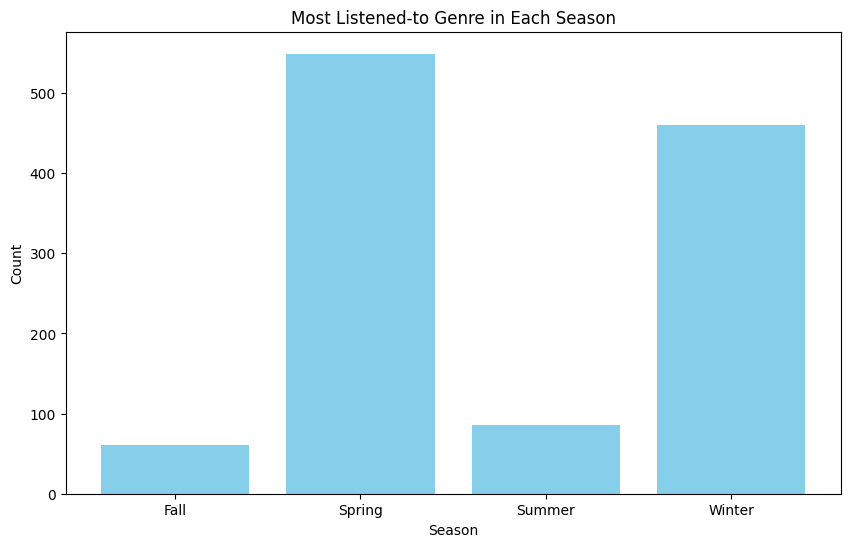

In [900]:
import matplotlib.pyplot as plt

# Assuming most_played_genre_season is the DataFrame containing the results
# from the previous analysis (Most Listened-to Genre in Each Season)
most_played_genre_season = pd.DataFrame({
    'season': ['Fall', 'Spring', 'Summer', 'Winter'],
    'top genre': ['pop', 'pop', 'pop', 'pop'],
    'count': [61, 549, 86, 460]
})

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(most_played_genre_season['season'], most_played_genre_season['count'], color='skyblue')
plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Most Listened-to Genre in Each Season')
plt.show()


In [901]:
import pandas as pd



# Group by 'season', 'year', 'artistName', and 'trackName' to find the count of each song
most_played_songs_combined = merged_df.groupby(['season', 'year_x', 'artistName', 'trackName']).size().reset_index(name='count') \
    .sort_values(['season', 'year_x', 'count'], ascending=[True, True, False]).groupby(['season', 'year_x']).head(1)

# Print the most played songs for each season
print("\nMost Played Songs in Each Season:")
print(most_played_songs_combined)



Most Played Songs in Each Season:
      season  year_x  artistName                   trackName  count
57      Fall    2023        BEGE                       2T1BB     63
2373  Spring    2023  Sena Şener                Sevmemeliyiz    112
2920  Summer    2023     ALIZADE                        24/7    135
4019  Winter    2022     Frawley           No One Can Fix Me     50
4841  Winter    2023     Frawley  If I Don't Laugh, I'll Cry    181


In [902]:
import pandas as pd

df_spotify['endTime'] = pd.to_datetime(df_spotify['endTime'], errors='coerce')

# Extract the month from 'endTime'
df_spotify['month'] = df_spotify['endTime'].dt.month

# Count occurrences of each month
month_counts = df_spotify['month'].value_counts()

# Find the least and most listened-to months
least_listened_month = month_counts.idxmin()
most_listened_month = month_counts.idxmax()

print(f"Least listened-to month: {least_listened_month}")
print(f"Most listened-to month: {most_listened_month}")


Least listened-to month: 7
Most listened-to month: 1


In [903]:
import pandas as pd

df_spotify['endTime'] = pd.to_datetime(df_spotify['endTime'], errors='coerce')

# Extract the month from 'endTime' and set it in the original DataFrame
df_spotify.loc[df_spotify['artistName'] == 'Little Mix', 'month'] = df_spotify['endTime'].dt.month

# Filter for 'Little Mix'
little_mix_df = df_spotify[df_spotify['artistName'] == 'Little Mix']

# Group by month and track to find the count of each song
most_played_little_mix = little_mix_df.groupby(['month', 'trackName']).size().reset_index(name='count') \
    .sort_values(['month', 'count'], ascending=[True, False]).groupby('month').head(1)

# Print the most played Little Mix songs in each month
print("Most Played Little Mix Songs in Each Month:")
most_played_little_mix


Most Played Little Mix Songs in Each Month:


,month,trackName,count
11,1,Cut You Off,41
69,2,Love a Girl Right,18
85,3,Confetti - Acoustic,12
119,4,Little Me,49
199,5,Wasabi,14
204,6,Love Me Like You,2
208,7,Love Me or Leave Me,1
210,9,"Secret Love Song, Pt. II",18
211,10,Confetti (feat. Saweetie),1
217,11,Power,4


In [904]:
import pandas as pd

df_spotify['endTime'] = pd.to_datetime(df_spotify['endTime'], errors='coerce')

# Filter for 'Little Mix'
little_mix_df = df_spotify[df_spotify['artistName'] == 'Little Mix'].copy()

# Create a new column 'season' based on the month
little_mix_df['season'] = little_mix_df['endTime'].dt.month.map({
    12: 'Winter',
    1: 'Winter',
    2: 'Winter',
    3: 'Spring',
    4: 'Spring',
    5: 'Spring',
    6: 'Summer',
    7: 'Summer',
    8: 'Summer',
    9: 'Fall',
    10: 'Fall',
    11: 'Fall'
})

# Group by season, artist, and track to find the count of each song
most_played_little_mix_season = little_mix_df.groupby(['season', 'artistName', 'trackName']).size().reset_index(name='count') \
    .sort_values(['season', 'count'], ascending=[True, False]).groupby(['season']).head(1)

# Print the most played Little Mix songs in each season
print("Most Played Little Mix Songs in Each Season:")
#print(most_played_little_mix_season)
most_played_little_mix_season

Most Played Little Mix Songs in Each Season:


,season,artistName,trackName,count
6,Fall,Little Mix,"Secret Love Song, Pt. II",18
37,Spring,Little Mix,Little Me,61
80,Summer,Little Mix,Love Me Like You,2
96,Winter,Little Mix,Cut You Off,52


In [905]:
import matplotlib.pyplot as plt
import seaborn as sns
df_spotify['count'] = 1
# Extract day_of_week and hour_of_day from the 'endTime' column
df_spotify['day_of_week'] = df_spotify['endTime'].dt.day_name()
df_spotify['hour_of_day'] = df_spotify['endTime'].dt.hour




In [906]:

df_spotify['count'] = 1

# Group by day_of_week, hour_of_day, and season and calculate the count
temporal_patterns = df_spotify.groupby(['day_of_week', 'hour_of_day', 'season']).size().reset_index(name='count')

# Display the temporal patterns without visualization
print("Temporal Patterns of Play Counts by Day and Hour for Each Season:")
print(temporal_patterns)


Temporal Patterns of Play Counts by Day and Hour for Each Season:
    day_of_week  hour_of_day  season  count
0        Friday            1  Summer     53
1        Friday            2  Summer      7
2        Friday            3  Summer     46
3        Friday            4  Summer     24
4        Friday            4  Winter     20
..          ...          ...     ...    ...
338   Wednesday           21    Fall      3
339   Wednesday           21  Spring     54
340   Wednesday           21  Winter      1
341   Wednesday           22  Spring      8
342   Wednesday           22  Winter     10

[343 rows x 4 columns]


In [907]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for seconds played
df_spotify['seconds_played'] = df_spotify['msPlayed'] / 1000  # Convert milliseconds to seconds

# Group by day_of_week, hour_of_day, and season, and sum the seconds played


In [908]:
# Create a new column for hours played
df_spotify['hours_played'] = df_spotify['seconds_played'] / 3600  # Convert seconds to hours

# Group by day_of_week, hour_of_day, and season, and sum the hours played
total_hours_played = df_spotify.groupby(['day_of_week', 'hour_of_day', 'season'])['hours_played'].sum().reset_index()

print("Total Hours Played for Each Combination of Day, Hour, and Season:")
print(total_hours_played)


Total Hours Played for Each Combination of Day, Hour, and Season:
    day_of_week  hour_of_day  season  hours_played
0        Friday            1  Summer      0.471066
1        Friday            2  Summer      0.030914
2        Friday            3  Summer      0.530236
3        Friday            4  Summer      0.348508
4        Friday            4  Winter      0.310072
..          ...          ...     ...           ...
338   Wednesday           21    Fall      0.037345
339   Wednesday           21  Spring      0.535896
340   Wednesday           21  Winter      0.038850
341   Wednesday           22  Spring      0.194956
342   Wednesday           22  Winter      0.213628

[343 rows x 4 columns]


In [909]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for minutes played
df_spotify['minutes_played'] = df_spotify['seconds_played'] / 60  # Convert seconds to minutes

# Group by day_of_week, hour_of_day, and season, and sum the minutes played


In [910]:
# Create a new column for minutes played
df_spotify['minutes_played'] = df_spotify['seconds_played'] / 60  # Convert seconds to minutes

# Create a pivot table to summarize total minutes played
pivot_table = df_spotify.pivot_table(values='minutes_played', 
                                     index=['day_of_week', 'hour_of_day'], 
                                     columns='season', 
                                     aggfunc='sum', 
                                     fill_value=0)

# Display the pivot table
print("Pivot Table of Total Minutes Played:")
print(pivot_table)


Pivot Table of Total Minutes Played:
season                       Fall      Spring     Summer     Winter
day_of_week hour_of_day                                            
Friday      1            0.000000    0.000000  28.263983   0.000000
            2            0.000000    0.000000   1.854833   0.000000
            3            0.000000    0.000000  31.814183   0.000000
            4            0.000000    0.000000  20.910467  18.604317
            5            0.000000    0.000000  38.605150  62.201100
...                           ...         ...        ...        ...
Wednesday   18           0.000000  208.104917   0.000000  49.295383
            19           0.000000  110.266300   0.000000  44.161300
            20           0.000000  107.138950   0.000000  74.993183
            21           2.240683   32.153767   0.000000   2.331017
            22           0.000000   11.697333   0.000000  12.817683

[134 rows x 4 columns]


In [911]:


# Group by day_of_week, hour_of_day, and season, and sum the seconds played
temporal_patterns = df_spotify.groupby(['day_of_week', 'hour_of_day', 'season'])['seconds_played'].sum().reset_index()

# Find the row with the maximum seconds played for each season
max_seconds_played = temporal_patterns.loc[temporal_patterns.groupby('season')['seconds_played'].idxmax()]

# Display the rows with the maximum seconds played
print("Temporal Patterns of Seconds Played by Day and Hour for Each Season:")
print(max_seconds_played)
max_seconds_played

Temporal Patterns of Seconds Played by Day and Hour for Each Season:
    day_of_week  hour_of_day  season  seconds_played
263     Tuesday           11    Fall        3937.844
207    Thursday           10  Spring       13735.498
313   Wednesday           11  Summer        3628.227
119    Saturday           10  Winter       17551.074


,day_of_week,hour_of_day,season,seconds_played
263,Tuesday,11,Fall,3937.844
207,Thursday,10,Spring,13735.498
313,Wednesday,11,Summer,3628.227
119,Saturday,10,Winter,17551.074


In [912]:


# Find the day and hour with the maximum play count for each season
max_play_counts = df_spotify.groupby(['season', 'day_of_week', 'hour_of_day'])['count'].max().reset_index()

# Display the rows with the maximum play counts
print("Day and Hour with Maximum Play Count for Each Season:")
print(max_play_counts)


Day and Hour with Maximum Play Count for Each Season:
     season day_of_week  hour_of_day  count
0      Fall      Friday            6      1
1      Fall      Friday            7      1
2      Fall      Friday            8      1
3      Fall      Friday           10      1
4      Fall      Friday           15      1
..      ...         ...          ...    ...
338  Winter   Wednesday           18      1
339  Winter   Wednesday           19      1
340  Winter   Wednesday           20      1
341  Winter   Wednesday           21      1
342  Winter   Wednesday           22      1

[343 rows x 4 columns]


In [913]:
# Create a pivot table to summarize total minutes played for each season
pivot_table_season = df_spotify.pivot_table(values='minutes_played', 
                                            index='season', 
                                            aggfunc='sum', 
                                            fill_value=0)

# Display the pivot table for total minutes played in each season
print("Pivot Table of Total Minutes Played for Each Season:")
print(pivot_table_season)


Pivot Table of Total Minutes Played for Each Season:
        minutes_played
season                
Fall        716.083783
Spring     8021.006633
Summer     1536.771300
Winter     8503.943817


<Figure size 1000x600 with 0 Axes>

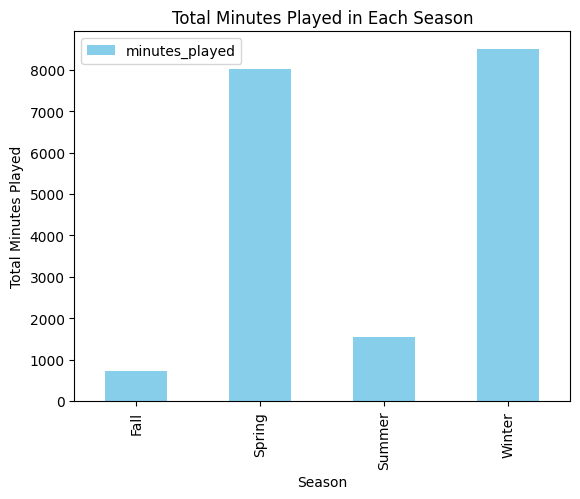

In [914]:
import matplotlib.pyplot as plt

# Create a pivot table to summarize total minutes played for each season
pivot_table_season = df_spotify.pivot_table(values='minutes_played', 
                                            index='season', 
                                            aggfunc='sum', 
                                            fill_value=0)

# Plot a bar chart for total minutes played in each season
plt.figure(figsize=(10, 6))
pivot_table_season.plot(kind='bar', color='skyblue')
plt.title('Total Minutes Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Total Minutes Played')
plt.show()


In [915]:
import pandas as pd


# Extract the month from the 'endTime' column
df_spotify['month'] = df_spotify['endTime'].dt.month_name()

# Count the unique artists for each month
most_artists_month = df_spotify.groupby('month')['artistName'].nunique().reset_index()

# Identify the month with the maximum count
most_artists_month_max = most_artists_month.loc[most_artists_month['artistName'].idxmax()]

print("Month with the most unique artists:", most_artists_month_max['month'])
print("Number of unique artists in that month:", most_artists_month_max['artistName'])


Month with the most unique artists: January
Number of unique artists in that month: 577


Month with the most unique artists: January
Number of unique artists in that month: 577


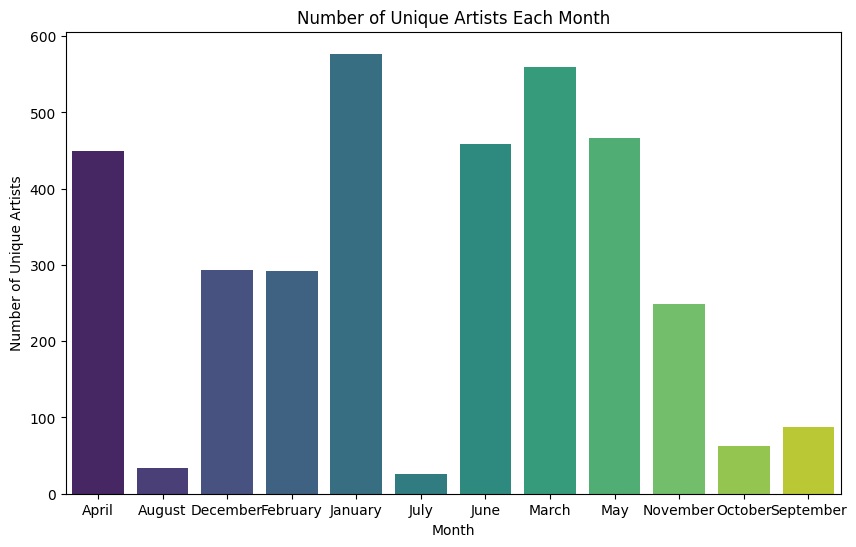

In [916]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract the month from the 'endTime' column
df_spotify['month'] = df_spotify['endTime'].dt.month_name()

# Count the unique artists for each month
most_artists_month = df_spotify.groupby('month')['artistName'].nunique().reset_index()

# Identify the month with the maximum count
most_artists_month_max = most_artists_month.loc[most_artists_month['artistName'].idxmax()]

print("Month with the most unique artists:", most_artists_month_max['month'])
print("Number of unique artists in that month:", most_artists_month_max['artistName'])

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='artistName', data=most_artists_month, palette='viridis', hue='month', legend=False)
plt.title('Number of Unique Artists Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Unique Artists')
plt.show()


In [917]:
import pandas as pd



# Extract the month from the 'endTime' column
df_spotify['month'] = df_spotify['endTime'].dt.month_name()

# Group by month and artist, then count the occurrences
monthly_artist_counts = df_spotify.groupby(['month', 'artistName']).size().reset_index(name='count')

# Find the artist with the maximum count for each month
most_listened_artist_per_month = monthly_artist_counts.loc[monthly_artist_counts.groupby('month')['count'].idxmax()]

# Display the result
print(most_listened_artist_per_month[['month', 'artistName', 'count']])


          month      artistName  count
380       April    Taylor Swift    546
465      August  Meghan Trainor     19
648    December      Little Mix     97
825    February  Camila Cabello    407
1380    January      Little Mix    495
1659       July  Meghan Trainor     20
1676       June         ALIZADE    301
2613      March    Taylor Swift    291
2941        May      Little Mix    259
3190   November   Billie Eilish     58
3464    October    Taylor Swift     16
3468  September         ALIZADE     58


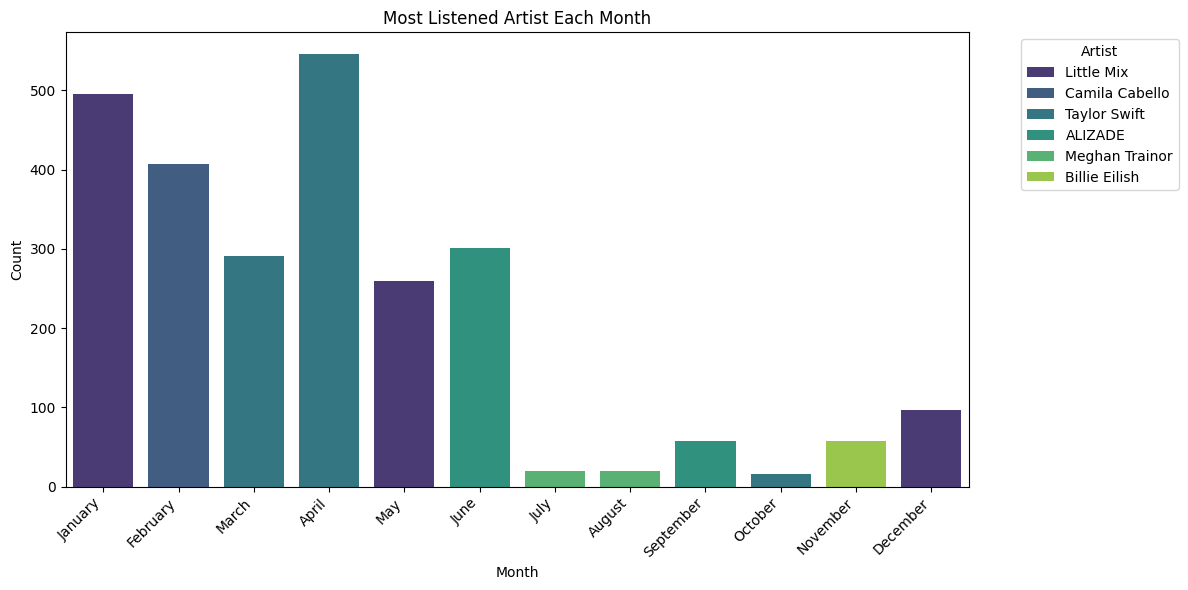

In [918]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Extract the month from the 'endTime' column
df_spotify['month'] = df_spotify['endTime'].dt.month_name()

# Group by month and artist, then count the occurrences
monthly_artist_counts = df_spotify.groupby(['month', 'artistName']).size().reset_index(name='count')

# Find the artist with the maximum count for each month
most_listened_artist_per_month = monthly_artist_counts.loc[monthly_artist_counts.groupby('month')['count'].idxmax()]

# Sort months in a meaningful order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
most_listened_artist_per_month['month'] = pd.Categorical(most_listened_artist_per_month['month'], categories=months_order, ordered=True)
most_listened_artist_per_month = most_listened_artist_per_month.sort_values(by='month')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', hue='artistName', data=most_listened_artist_per_month, palette='viridis')
plt.title('Most Listened Artist Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Artist', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


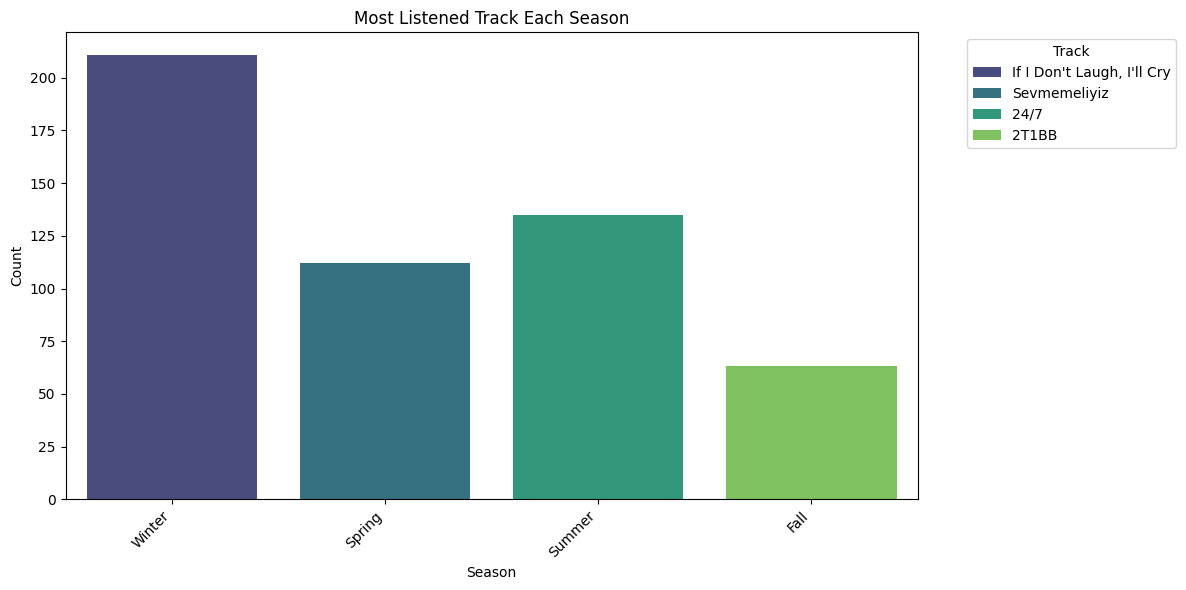

In [919]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Group by season and track, then count the occurrences
seasonal_track_counts = df_spotify.groupby(['season', 'trackName']).size().reset_index(name='count')

# Find the most listened-to track for each season
most_listened_track_per_season = seasonal_track_counts.loc[seasonal_track_counts.groupby('season')['count'].idxmax()]

# Sort seasons in a meaningful order
seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
most_listened_track_per_season['season'] = pd.Categorical(most_listened_track_per_season['season'], categories=seasons_order, ordered=True)
most_listened_track_per_season = most_listened_track_per_season.sort_values(by='season')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='count', hue='trackName', data=most_listened_track_per_season, palette='viridis')
plt.title('Most Listened Track Each Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Track', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



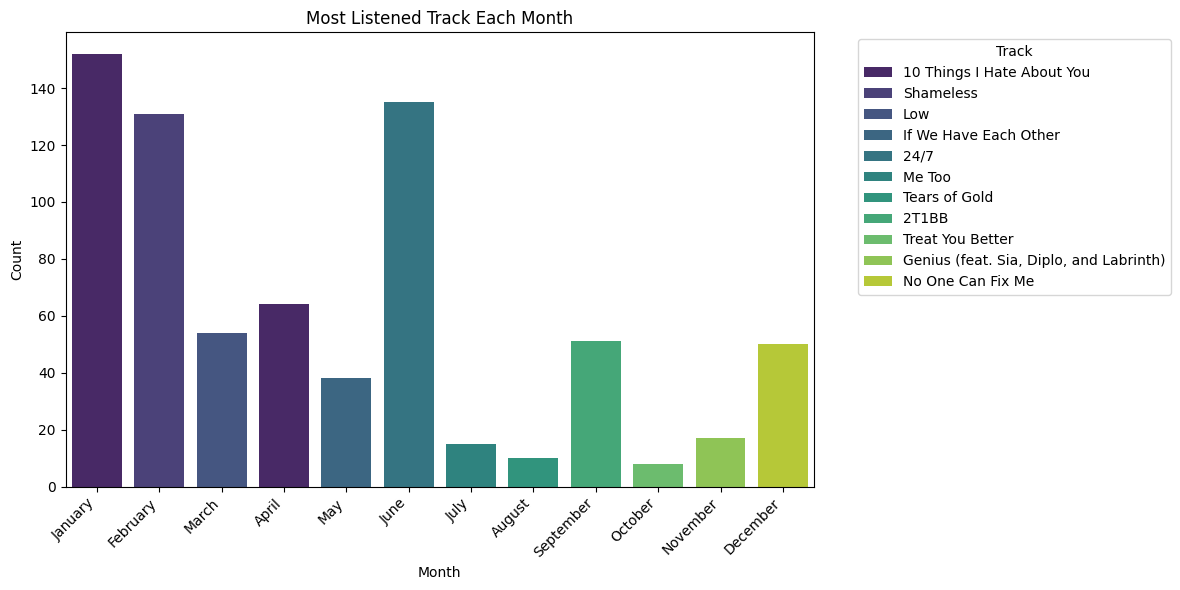

In [920]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Group by month and track, then count the occurrences
monthly_track_counts = df_spotify.groupby(['month', 'trackName']).size().reset_index(name='count')

# Find the most listened-to track for each month
most_listened_track_per_month = monthly_track_counts.loc[monthly_track_counts.groupby('month')['count'].idxmax()]

# Sort months in a meaningful order
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
most_listened_track_per_month['month'] = pd.Categorical(most_listened_track_per_month['month'], categories=months_order, ordered=True)
most_listened_track_per_month = most_listened_track_per_month.sort_values(by='month')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', hue='trackName', data=most_listened_track_per_month, palette='viridis')
plt.title('Most Listened Track Each Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Track', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
